## Generalized Framework pipeline for analzying NetLogo Agent Based Models in Python
Kit Martin


## Introduction
In this project I wanted to develop some best practices to analyze NetLogo models using Python. In our lab we maintain the program NetLogo, which my advisor wrote, and also spend a lot of time building models and validating them. NetLogo has a built-in experimentation platform called Behavior Space. Unfortunately Behavior space exports a CSV file which is not amenable to standard analysis. Thus, I set out to build the means to analyze most any NetLogo model using a Jupyter Notebook I could share with lab mates. Thus reducing the time it takes to analyze our models. In other words, I wanted to develop best practices for analyzing these agent-based models in Python so we could avoid reinventing the wheel each time.


## Relevant Background information:  the two agent based models

In order to develop best practices to analyze agent based models in python, I wanted to analyze two social models that I find particularly interesting. The first is an ant model that I developed. In it colonies of ants go out collect food and return to their nest. When the nest builds up enough food to feed a child ant, the new ant is born. Overtime the ants build up enough food reserves to build a queen ant who goes out and mates to the other colonies. When this happens, the new queen founds a new colony. In this model there is some tensions between resources and Colony Foundation that creates structures within the social distribution of the ant colonies. This model was developed to show how ant colonies coordinate mating by season through self-organization instead of coordinated control.

The second model is about political regime stabilization after revolution. In it there are agents which own territory, and territory to be claimed. The agents have complex interacting identities that make them have affiliations with each other that order how they form alliances. In this model there is one agent of particular importance, the government. It controls things like the radio station, the security forces and road networks, which give it an unfair advantage. The model measures how the diversity in the number of different factions supports or hinders the government's ability consolidate all the territory under its influence.

## Methods: Model 1 Analysis of ant mating model

In order to analyze the ant model I had to fix one major problem, NetLogo does not export CSV in a way that is easily importable into pandas. Thus I needed to develop a way to export .csv from NetLogo in standard column and row delimited rows with a one row header. In my model there are ants and there are nests. I made the decision that I would analyze the nests for they reproduce in ant colonies and therefore are the ones that show how organizations of mating behavior occurs. Below i will show how I resturctured the NetLogo data and my approach to analyzing the ant mating model. Below that I will show how I analyzed the political model.

## Import Packages
At the beginning of the project I import the packages that I think other NetLogo users are likely to want to use to analyze their  projects. While wasteful to import packages I may or may not use, it is helpful to have a compendium of Primitives for users to utilize. So in a way, over providing them is a useful way of letting them know what is available.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import datasets, cluster
from mpl_toolkits.mplot3d import Axes3D
from numpy import genfromtxt

In [11]:
%matplotlib inline ## in order to see the graphics inside of the Jupyter Notebook

## Set the Working Directory
I built the NetLogo code to write files to the directory where the model is located. There were two issues with Netlogo data. The first, is that NetLogo does not naitively export data in a format that Pandas accepts. It puts lots of information about the model at the top of the file, and the rows are not easy to interepret. The second problem, is that NetLogo can not append data to an already created file, it has to create a new file. Thus, I needed to combine the CSV files NetLogo exports into a single .csv file that Pandas can import for processing using Sci-Kit Learn and other Machine Learning packages.

In NetLogo, the code I wrote to export the agents information each tick: First I set a time variable. 
From there I exported the information, the time, the day that colony releases it reproductive (a number between the first and 50th day of the year), the colonies x and y coordinates, its color( a proxy for its lineage) and how much food that colony has stored (a value between -50 and 9. A colony reproduces if it has more than 9 food, which sets it to -50 food). These data were exported  to a .csv  under the file 'Oscilation + time.csv' and asked each agent to export their parameters there.


In [ ]:
## The NetLogo code
In NetLogo, the code I wrote to export the agents information each tick: First I set a time variable. Than only exported if the time was 1.
From there I exported the information to a csv format under the file 'Oscilation + time.csv' and asked each agent to export the parameters.

to sampledata
  let time ticks
  if ticks = 0 [set Sample 0]
  Set Sample Sample + 1
  csv:to-file (word "Osciliation" Ticks".csv") [(list ticks birth-number xcor ycor color foodstore )] of nests
end

In [12]:
cd /Users/Kit/pycoursework/Project/Run 2

/Users/Kit/pycoursework/Project/Run 2


## Combining all the files togther
When I run the model, every time increment, the model simulates ants collecting food and colonies food stores growing so they can reproduce more ants. To capture this change over time I wrote a simple sample data function into my model. Simply put, this function asks each of the nest agents in my model to export the variables of interest at every time step in the model. Because I cannot append data to a previously existing file, NetLogo has no write to open file ability, NetLogo generates thousands of individual CSV files. So using what I learned in this class I took the approximately 3,700 CSV files necessary to see the emergent/interesting behavior in a colony model, and combine them into one file for more interesting time series analysis in our Jupyter notebook.

In the code below we open a new file, called out.CSV. Then we run a for Loop over all the files generated by netlogo, located in the current directory, and we write the lines so for numbers in the range between 0, meaning the first time increment, and the last time increment, for instance the 3463rd file. Then we write the text “oscillation”, plus the current index of time, plus the text “.CSV”. then we write the output of that file to the bottom of the “out.CSV” file which we previously opened. For good housekeeping we close all of our files.


In [40]:
fout=open("out.csv","a")
# first file:
for line in open("Osciliation0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,3463):
    f = open("Osciliation"+str(num)+".csv")
    #f.next() # skip the header
    for line in f:
         fout.write(line)
    f.close() 
fout.close()

## Importing data to Python for Analysis
One data structure that is incredibly efficient which python often makes use of is the  dataframe. A data frame is a list of lists. In the simplest form a dataframe is a list of indices, and some variable of interest. In my ant model the variables of Interest were time, what day of the year ant colonies release reproductives that ant colony’s x coordinate, that colony’s y coordinate, the color of that Nest, as well as how much food that nested stored.

Above, in the importation of packages section, I import pandas as the shorthand PD. Here I make use of pandas to import the CSV file “out.CSV” into the jupyter notebook for analysis with python. This code was written to act on file in the same directory as the code. To find out the current working directory one can write PWD.  


In [13]:
pwd #path to working directory, i.e., where am I. Currently I am working in my folder /Users/Kit

'/Users/Kit/pycoursework/Project/Run 2'

In [14]:
data = pd.read_csv('out.csv', na_values=['.'],
                   names=['Time','ReleaseReproductives','CordinatesX','CordinatesY','ColorOfNest',#names the cololumn headings
                          'Howmuchfoodstored'])

In [15]:
data.head() #typing data allows us to inspect our data to make sure it appears as we hoped it would.

,Time,ReleaseReproductives,CordinatesX,CordinatesY,ColorOfNest,Howmuchfoodstored
0,0,53,2.887515,22.255112,105,-0.1
1,0,48,-6.116926,-8.348311,55,-0.1
2,0,19,20.325373,20.046283,45,-0.1
3,0,13,3.339117,18.301302,125,-0.1
4,0,9,3.336116,-25.005686,85,-0.1


In [43]:
# print the shape of the DataFrame. This one has 367877 rows, and six columns. 
data.shape

(367877, 6)

## Results
Data exploration is the first step in understanding an output. Here we use side by side comparison of Scatter Plots of several variables of Interest. First we look at how much food is stored varies over time. Second we see if there is any reduction in the time of the year that ant coloniess release their reproductives overtime.Third, we see where all colonies are located, on the X Y coordinates, throughout the enture period of the sample. These three graphs show us first that stored food varies seasonally. This makes sense as there is a springtime modeled into the simulation and so it should peak and trough overtime. 2nd in the run that this is analyzing it looks like there is only a drop off in the early days of the sample, that is the colonies that release their reproductives in the first 10 days. Third it looks like colonies are evenly distributed across the map over time.


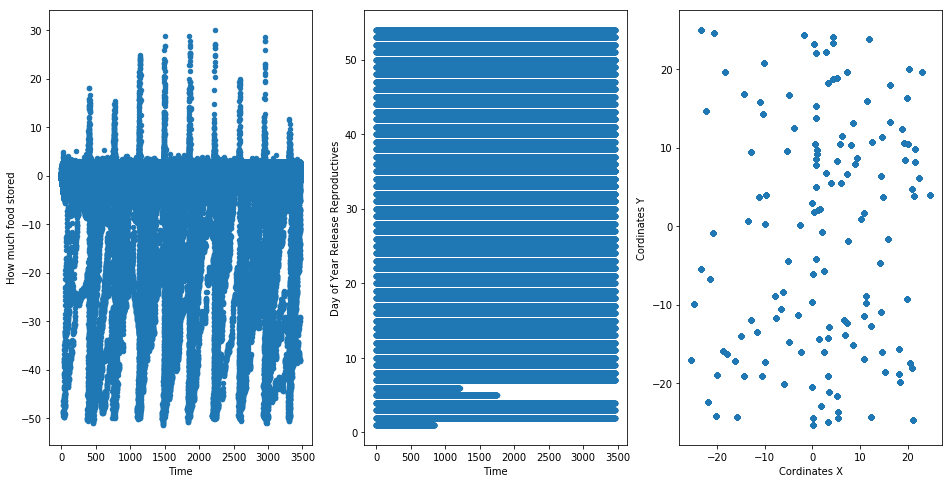

In [68]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=False)
data.plot(kind='scatter', x='Time', y='How much food stored', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Time', y='ReleaseReproductives', ax=axs[1])
data.plot(kind='scatter', x='Cordinates X', y='Cordinates Y', ax=axs[2])

Caption: We can see that there's a great deal of variation in the amount of food the colonies have by the figure above on the left. This is caused by the seasonality in the model that on the 28th day of each year spring time comes. Spring floods the simulation with food. Next, over the 3000 steps  we see that in the first 10 days of the year a drop off as a simulation goes in the number of colonies that have those emergence cues.  This indicates that colonies who released after the 10th maybe slightly more fit. This is fairly interesting finding. Last, on the left we see over the course of the model a fairly even distribution of colonies over the X Y coordinates of the spacial model.

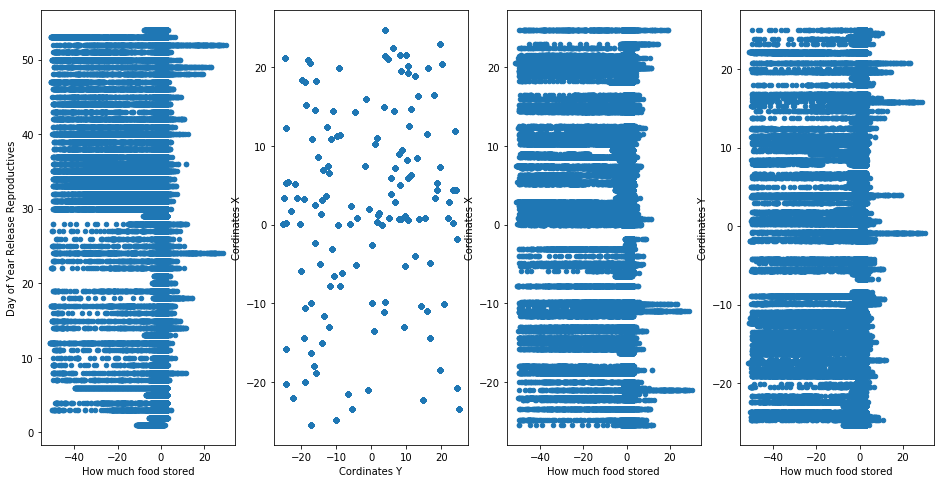

In [57]:
fig, axs = plt.subplots(1, 4, sharey=False)
data.plot(kind='scatter', x='How much food stored', y='ReleaseReproductives', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Cordinates Y', y='Cordinates X', ax=axs[1])
data.plot(kind='scatter', x='How much food stored', y='Cordinates X', ax=axs[2])
data.plot(kind='scatter', x='How much food stored', y='Cordinates Y', ax=axs[3])

Caption: Left we see some structure into how much food is stored by emergence cue. again we see that colonies that released the gametes before spring time on average have lower food stores over the course of the 3000 days the model simulates. we also see that certain exit coordinance lead to higher food stores that other ex coordinance of course some x coordinates never had any colonies on them because it's not a fully packed model. And some had variation and how much they had this would indicate he's dying off. On the far right we see the same effect for Y coordinates. This indicates the location of the map leads to some effect on Colony food intake and how much they gather

## Linear Regression
Next I want you to look at what causes release timings. Basically as colonies grow and expand the number of their children, then more colonies with that release timing will proliferate. Thus by looking at the impact of different variables on the independent variable 'release timing of reproductives' I can see what, over the time span of the model, causes those colonies success.

So I import the stats model API, and create linear regression model, named LM. The linear regression model is as follows: what is the impact on colonies timing of the release of their reproductives of time, x coordinate, y coordinate, team belonging and how much food it has stored. By controlling for each of these variables we can look at their individual impact on the timing of release. Running this model we find that many of the parameters have a low impact.


In [17]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

In [18]:
lm = smf.ols(formula='ReleaseReproductives ~ Time + CordinatesX + CordinatesY + ColorOfNest + Howmuchfoodstored', data=data).fit() 
         

In [21]:
lm.params

Intercept            25.246751
Time                  0.000808
CordinatesX          -0.109291
CordinatesY          -0.137406
ColorOfNest           0.036031
Howmuchfoodstored    -0.218724
dtype: float64

## In order to understand the impact on the release timing we sumamrize the parameters. 
Near the bottom, we see that coefficients the model generates. We see that later in the model, more colonies have higher release timings (For every 1 increase of time, their is a 0.0008 increase in the release timing). Additionally,We see that colonies that release later in the year, normally have less food. This could mean they gather less food, or it could mean they reproduce more often. This would indicate the need for more investigation.

In [91]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ReleaseReproductives   R-squared:                       0.071
Model:                              OLS   Adj. R-squared:                  0.071
Method:                   Least Squares   F-statistic:                     5607.
Date:                  Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                          13:15:08   Log-Likelihood:            -1.4889e+06
No. Observations:                367877   AIC:                         2.978e+06
Df Residuals:                    367871   BIC:                         2.978e+06
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            25.2468      0.062    405.607      0.000      25.125      25.369
Time                  0.0008   2.26e-05     35.812      0.000       0.001       0.001
CordinatesX          -0.1093      0.002    -61.566      0.000      -0.113      -0.106
CordinatesY          -0.1374      0.002    -87.884      0.000      -0.140      -0.134
ColorOfNest           0.0360      0.001     59.463      0.000       0.035       0.037
Howmuchfoodstored    -0.2187      0.003    -83.274      0.000      -0.224      -0.214
==============================================================================
Omnibus:                    65892.601   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14131.209
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.048   Cond. No.                     5.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Histograms
From our causal model it looked like their was two possibilities. So to answer if later releasing colonies were more fecund, or less, we use histograms. From this histogram we find that more colonies exist, after 3643 days, that release after the 30th day of the year than before. This points to the idea that colonies who release later, often times reproduce more, because they have more food, and thus, have less food.

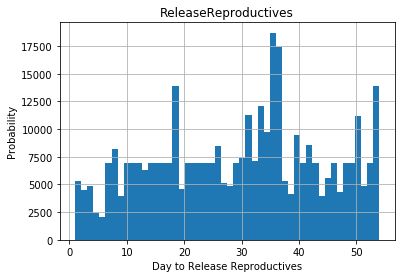

In [94]:
%matplotlib inline
x = data.column="ReleaseReproductives"
data.hist(x, normed=False, bins=50)
plt.ylabel('Probability');
plt.xlabel('Day to Release Reproductives');

## Unsupervised Learning
So we discovered the release timing is impacted strongly by Spring. Next to wanted to see if there any natural clusters of types of colonies in power model how many ways of doing this.

Play many ways of doing this but to start off as a simple approach we wanted to use K means clustering. K means clustering basically says if we try to find some number of groups in what way does r model disaggregate into those groups. So we first analyze the model using a 3D scatter plot. We see that in the long run there's some drop off in the kinds of reproductive happening near the end of the model.

We find that there are 12 distinct groups in the model and we plot them we get a banded release this suggests that certain parameters might be correlated with other parameters. As a result we run a cord to see what is correlated with release reproductive cells. Well there's analysis to not conclusively prove anything it did allows for an open-ended exploration of the model and its outputs and what provide a core way of analyzing an agent-based model from one Agents sets, the nests, perspective. As the objective of the exercise which create a generalizable framework for analyzing agent based models this is a first start. Next time we'll use Python to analyze aggregate statistics that come out of a political science regime change model.


In [103]:
# do the clustering
k_means = cluster.KMeans(n_clusters=7)
k_means.fit(data) 
labels = k_means.labels_

In [104]:
##checking input type compatible (not nan and such)
np.any(np.isnan(data))

False

In [105]:
np.all(np.isfinite(data))

True

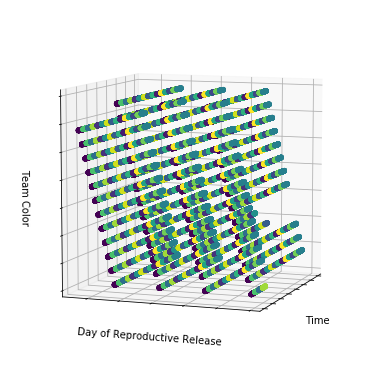

In [113]:
# plot the clusters in color
%matplotlib inline

fig = plt.figure(1, figsize=(5, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()

ax.scatter(data["Time"],data["ReleaseReproductives"], data["ColorOfNest"], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Time')
ax.set_ylabel('Day of Reproductive Release')
ax.set_zlabel('Team Color')

plt.show()

Caption: Overtime  we see that teams and the 15 220 range that is colors of red to orange additionally gray have a drop-off in the number of colonies they have. mod those teams did not fare as well as colors or teams in the upper numbers.

In [108]:
# Import the kmeans clustering model.
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=15, random_state=1)
# Get only the numeric columns from games.
good_columns = data._get_numeric_data()
# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_

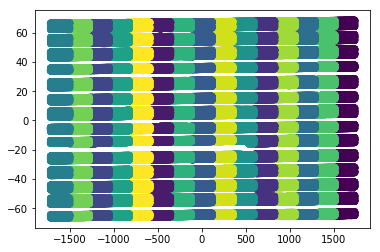

In [109]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [110]:
data.corr()["ReleaseReproductives"]

Time                    0.063739
ReleaseReproductives    1.000000
CordinatesX            -0.135787
CordinatesY            -0.172787
ColorOfNest             0.113624
Howmuchfoodstored      -0.137325
Name: ReleaseReproductives, dtype: float64

Caption: As said above, the color of the nest was indicative of the mirror emergence Q meaning columns at least later where can I clear to have a left red or gray color and a more blue color in our logo simulation of colors.

## Introduction
In the first part we wanted to analyze a model from individuals nests perspective. So we had each agent export its variables and analyzed them. In this model, we export the end of run aggregates of a model, and analyze those aggregates.

As before, I import more packages than I need.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy
import sklearn

from sklearn.cross_validation import train_test_split


from sklearn import datasets, cluster
from mpl_toolkits.mplot3d import Axes3D
from numpy import genfromtxt

## Data
Previously we analyzed individual agents variables at every time step. This time we export reporters at the end of each model run. These Aggregates of thousands of models show a different kind of trend. They show the entire problem space that could be an output of this model over many runs. By varying the parameters in each model it shows the problem space the simulation can represent. This was exported using the built-in experimentation software Behavior space. Behavior space is built into netlogo and with a little bit of data cleaning (actually quite a lot)  we can turn this into a pandas dataframe. Below we can see the pandas dataframe with several variables of Interest. There are numbers of identities, the percentage of territory owned by the government, the time, what random seed we used, the percentage of the total patches which support the government, the herfindahl index which measures the market share, that is the total amount of territory, owned by the government, along with other variables of potential interest in some analysis.

In [24]:
data = pd.read_csv('DPHBasakeditscurrentmodel_Ethniland-Baselineclean.csv', dtype='float',index_col=0, na_values=['.'])
data.head()

,NumberOfIdentities,Government_percentage,step,RandomSeed,GovernmentSocietyRatio,herfindahlActivated,reportActiveContenders,reportActiveStateID,Dominant,reportTotalTension,Label
[run number],,,,,,,,,,,
9.0,7.0,0.15,0.0,9.0,0.14,0.14,407.0,360.0,0.0,0.0,NaN
1.0,7.0,0.15,0.0,1.0,0.15,0.14,386.0,397.0,0.0,0.0,NaN
3.0,7.0,0.15,0.0,3.0,0.15,0.14,423.0,387.0,0.0,0.0,NaN
11.0,7.0,0.15,0.0,11.0,0.16,0.14,418.0,419.0,0.0,0.0,NaN
4.0,7.0,0.15,0.0,4.0,0.16,0.14,405.0,418.0,0.0,0.0,NaN


In [ ]:
iris = pd.read_csv('DPHBasakeditscurrentmodel_Ethniland-Baselineclean - DPHBasakeditscurrentmodel_Ethniland-Baselineclean2.csv', 
                   names=['NumberOfIdentities','Government_percentage','step','RandomSeed','GovernmentSocietyRatio',
                          'herfindahlActivated','reportActiveContenders','reportActiveStateID','Dominant','reportTotalTension', 'Label'])
target = iris["Label"]  #provided your csv has header row, and the label column is named "Label"

#select all but the last column as data
data = iris.ix[:,:-1]

In [26]:
#Checking the Shape of the Model we see we have 101,000 rows and 11 columns
data.shape

(101000, 11)

## Results exploring the data
Over the 101,000 model runs, we can see a trend by using a scatter plot. As the amount of Market ownership of the government increases the amount of government Society ratio also increases this is interesting because it every level of numbers of identities weather be 10 or 30 we see a complete distribution of goblin Society ratio, this means that the two or probably acting independently of each other. Are we still see greater unification of government Society ratio as the herfindahl index increases.

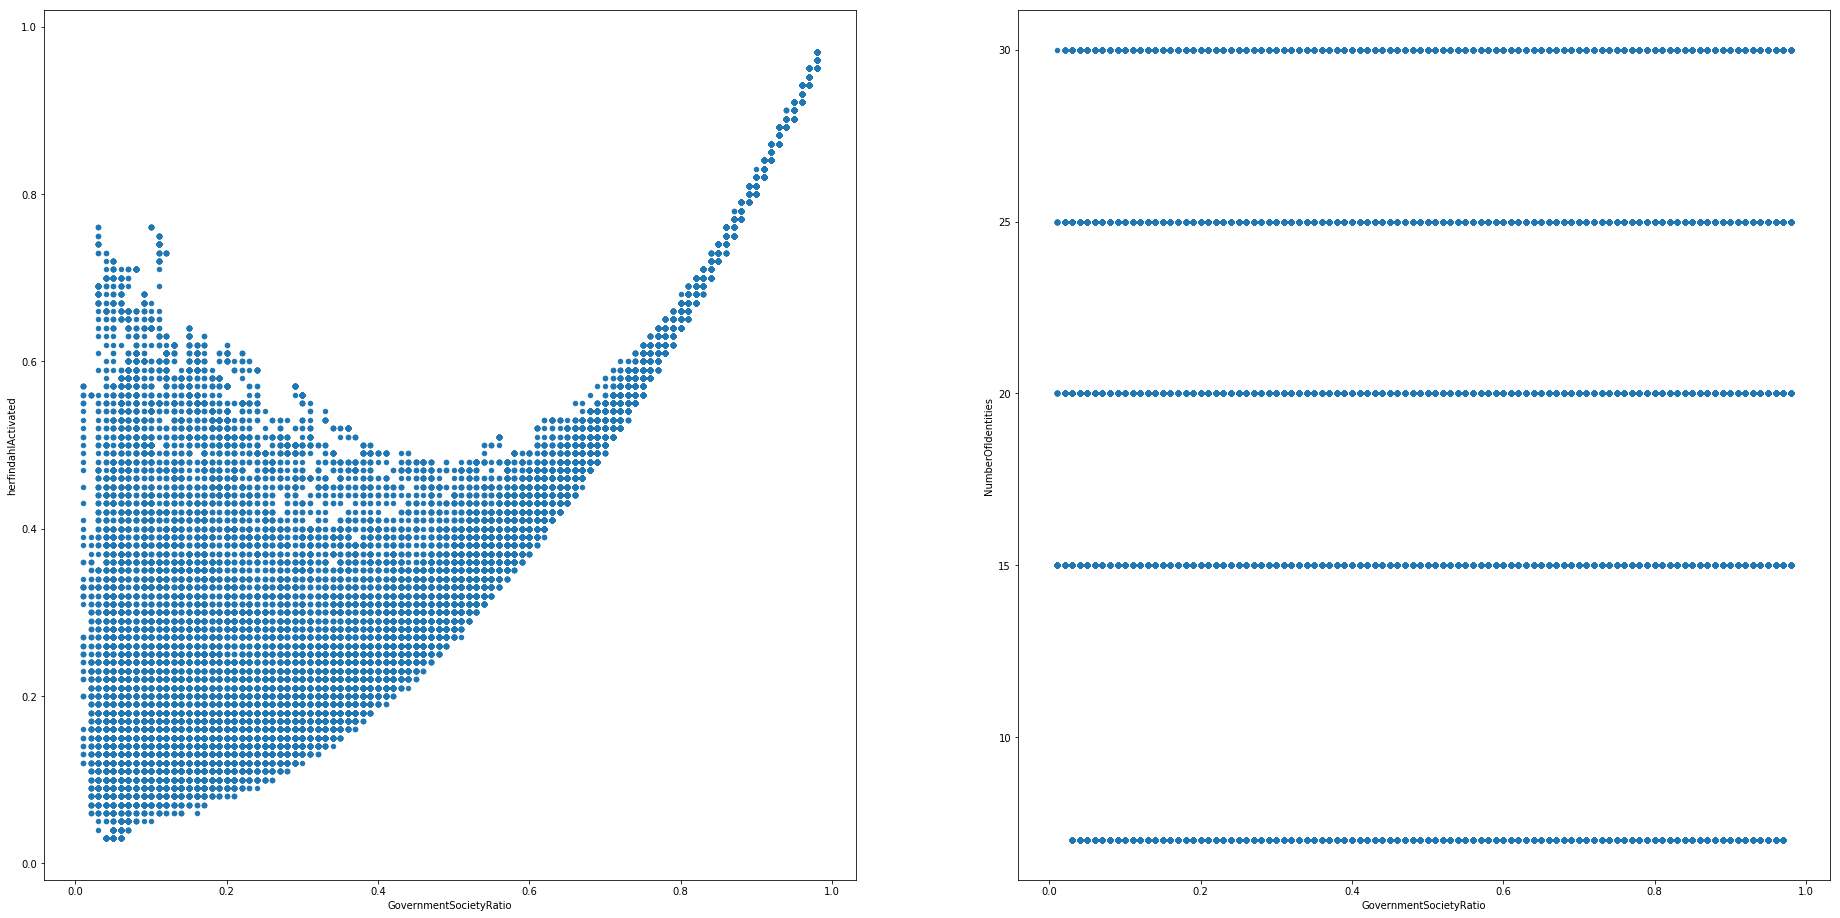

In [27]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=False)
data.plot(kind='scatter', x='GovernmentSocietyRatio', y='herfindahlActivated', ax=axs[0], figsize=(32, 16))
data.plot(kind='scatter', x='GovernmentSocietyRatio', y='NumberOfIdentities', ax=axs[1])


caption: Linear Regresion
Next week create a linear regression looking at the the causal impact of several variables on government Society ratio. Running this model we see the mini of the impacts have some effect on them on the ratio. And the number of identities is perfectly collinear with the government Society ratio. This last Point means we can reinterpret the government Society ratio to say that herfindahl index of the government meaning their market share increases dramatically as the number of identities represented in the model increases. Because perfect collinearity means we can collapse those variables. Alternatively, this discovery could question how the variables were constructed in NetLogo, this exploration may lead to our models refinement.

In [29]:
lm = smf.ols(formula='GovernmentSocietyRatio ~ step + NumberOfIdentities + Government_percentage + RandomSeed + herfindahlActivated + reportActiveContenders + reportActiveStateID + reportTotalTension', data=data).fit() 

In [30]:
lm.params

Intercept                -9.676426e-06
step                     -5.005056e-07
NumberOfIdentities        3.319849e-06
Government_percentage     4.089408e-04
RandomSeed               -2.704221e-07
herfindahlActivated      -4.653003e-04
reportActiveContenders    4.408376e-08
reportActiveStateID       3.844871e-04
reportTotalTension        0.000000e+00
dtype: float64

In [31]:
lm.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encounte

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     GovernmentSocietyRatio   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                  1.000
Method:                     Least Squares   F-statistic:                 1.733e+08
Date:                    Tue, 05 Dec 2017   Prob (F-statistic):               0.00
Time:                            09:24:08   Log-Likelihood:             4.4755e+05
No. Observations:                  101000   AIC:                        -8.951e+05
Df Residuals:                      100992   BIC:                        -8.950e+05
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -9.676e-06      0.000     -0.069      0.945      -0.000       0.000
step                   -5.005e-07   3.63e-07     -1.378      0.168   -1.21e-06    2.11e-07
NumberOfIdentities       3.32e-06   7.86e-06      0.422      0.673   -1.21e-05    1.87e-05
Government_percentage      0.0004      0.001      0.701      0.483      -0.001       0.002
RandomSeed             -2.704e-07   2.19e-07     -1.237      0.216   -6.99e-07    1.58e-07
herfindahlActivated       -0.0005   7.74e-05     -6.009      0.000      -0.001      -0.000
reportActiveContenders  4.408e-08   3.31e-08      1.330      0.183   -2.09e-08    1.09e-07
reportActiveStateID        0.0004   2.52e-08   1.53e+04      0.000       0.000       0.000
reportTotalTension              0          0        nan        nan           0           0
==============================================================================
Omnibus:                    84040.331   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5990.665
Skew:                          -0.005   Prob(JB):                         0.00
Kurtosis:                       1.807   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Caption: The linear regression model returns some interesting indicative results, but only 1 of them is signifigant. When the government society ratio increases by 1%, the herfindal index decreses by  -0.000005, or .0005%. This means that mark share decreases as the government consolidates. This is likely an issue of lower the amount of borders the government has.

## Discussion
Analyzing agent-based models using python is a powerful framework. As I build up a database of approaches to looking at how agents behave and their Dynamics. I think I can unlock some of the issues of validity between agent-based models and empirical data. This approach could allow for a better fit between synthetic data streams and real-world data streams, potentially. The first model I found interesting results in terms of certain colonies were affected by Springtime and their Fitness overtime. This was highlighted in a 3D scatter plot that showed how time, color that is a proxy for lineage in this model, and the day that is assigned to reproduce all work together for that group's long-term Fitness in the simulation. Such structure inside of a social system over a long time has potential analytical ability to look at other social systems, Cutest mixed agent-based and social inquiry approach. I said I'm excited to share these work with my lab as I think it will give many of the social scientist a leg up in terms of analyzing their models and comparing it to off-the-shelf data.

In the second model I analyzed aggregate data runs. This is looking at the entire problems space that a model under certain parameter changes may experience. This is usually not possible in the real world, because history, and its counterfactual political systems do not allow the exploration of all possible outcomes under a parameters space. Thus, this kind of exploration, or sensitivity analysis of certain factors, potentially allows otherwise unstudiable situations, such as alternative regime consolidations to be examined.


## Conclusions/future work

In this report, I covered the analysis of two social complex systems models. This approach provides a beginning for my lab to start using python to analyze the agent based models we create. This integtation of python an NetLogo has a wide ranging impact on our resurch. I found tha linear regression modeling, and kmeans analys particularly useful in understanding the dynamics in these models. Also, side by side comparisons of scatter plots was too. Alos, using python to append NetLogo's natural .csv outputs into one long file was a useful additon. I think this will enable more development of analysis of NetLogo with Python. This could potentially become a NetLogo extension.